# The Sparks Foundation - Data Sciense & Business Analytics Internship

Auther - Krushnai Chandrakant Khairnar

Batch - April 2022

# Task 1 - Prediction using Supervised machine learning.

simple linear regression 

In [54]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# Reading data from given link.
csv_url = "http://bit.ly/w-data"
data=pd.read_csv(csv_url)

In [56]:
print(data.shape)

(25, 2)


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [58]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [59]:
data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [60]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


we can find manually any relationship between the data. so we create a plot.

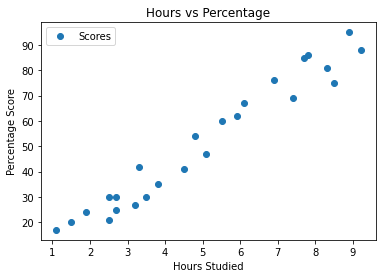

In [61]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [62]:
X=data['Hours'].values
Y=data['Scores'].values

In [63]:
X

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [64]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method.

In [65]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, Y,
                           test_size=0.2, random_state=0)

# Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [66]:
mx=np.mean(X_train)
my=np.mean(y_train)
n= len(X_train)

In [67]:
mx

5.24

In [68]:
my

53.95

In [69]:
n

20

In [70]:
a = 0
b = 0
for i in range(n):
  a +=(X_train[i]-mx)*(y_train[i]-my)
  b +=(X_train[i]-mx)**2
slope_line=a/b
slope_line

9.910656480642235

In [71]:
c=my-(slope_line*mx)
print(slope_line,c)

9.910656480642235 2.0181600414346903


In [72]:
maxx=np.max(X_train)+1
minx=np.min(X_train)-1

In [73]:
x=np.linspace(minx,maxx,10)
y=c+slope_line*x

In [74]:
x

array([ 0.1       ,  1.22222222,  2.34444444,  3.46666667,  4.58888889,
        5.71111111,  6.83333333,  7.95555556,  9.07777778, 10.2       ])

In [75]:
y

array([  3.00922569,  14.13118463,  25.25314357,  36.37510251,
        47.49706145,  58.61902039,  69.74097933,  80.86293827,
        91.9848972 , 103.10685614])

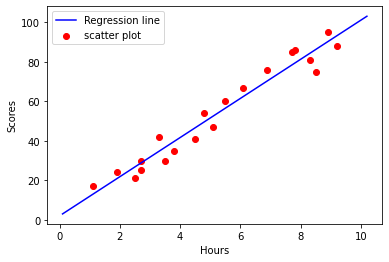

In [76]:
plt.plot(x,y,color='blue',label='Regression line')
plt.scatter(X_train,y_train,c='red' , label='scatter plot')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

# Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [77]:
print(x_test) # Testing data - In Hours
y_pred = c+(slope_line*x_test) # Predicting the scores

[1.5 3.2 7.4 2.5 5.9]


In [78]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'actual': y_test, 'Predicted': y_pred})
df

,actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [79]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [80]:
my=np.mean(y_test)

In [81]:
sst=0
ssr=0
n=len(y_test)
for i in range(n):
  sst+=(y_pred[i]-my)**2
  ssr+=(y_test[i]-my)**2
r2=sst/ssr
print(r2)

1.2055199541753725


In [82]:
# for testing our own data 
x1=9.25
y_ans=c+(slope_line*9.25)
print("NO of Hours = {} ".format(x1))
print("predicted score = {}".format(y_ans))

NO of Hours = 9.25 
predicted score = 93.69173248737536


# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [83]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.1838598990029725


.











.

From above simple linear regression model we predicted that if student studies for 9.25 hr/day and predicted score come out to be 93.69 %  with mean absolute error is 4.18.

.




.